# Importation des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objs as go
import dash
import dash_core_components as dcc
import dash_html_components as html
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, adjusted_rand_score
from sklearn.decomposition import PCA, TruncatedSVD
%matplotlib inline

# Importation des données

In [2]:
bank_of_america = pd.read_csv("Bank_of_America_data.csv")

# Compréhension des données

In [3]:
bank_of_america.shape

(5960, 13)

In [4]:
bank_of_america.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [5]:
bank_of_america.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [6]:
bank_of_america.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [7]:
bank_of_america.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [8]:
bank_of_america.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [9]:
bank_of_america.describe(include=['object'])

,REASON,JOB
count,5708,5681
unique,2,6
top,DebtCon,Other
freq,3928,2388


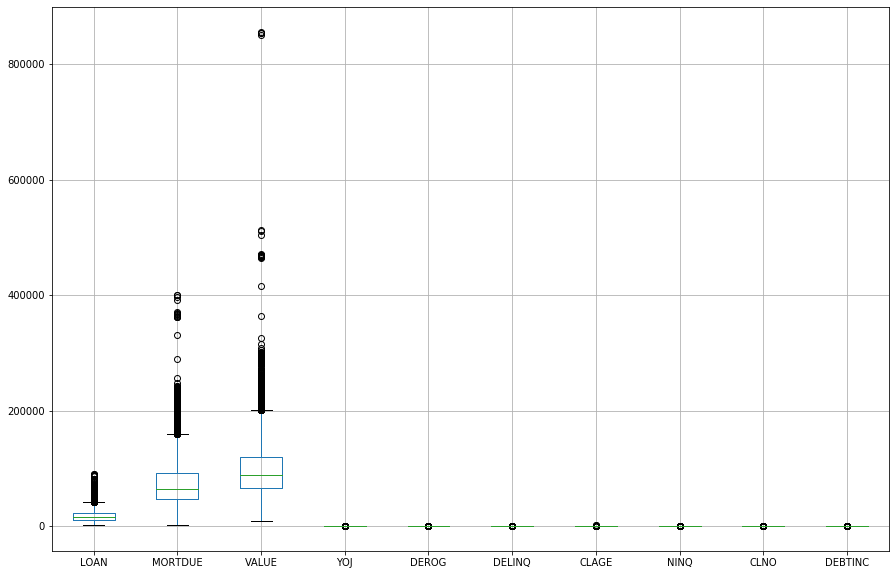

In [10]:
bank_of_america.iloc[:,1:].boxplot(figsize=(15,10));

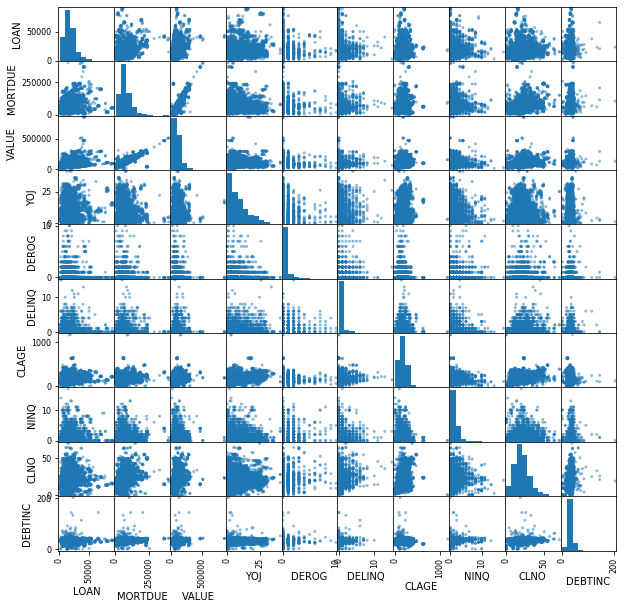

In [11]:
pd.plotting.scatter_matrix(bank_of_america.iloc[:,1:],figsize=(10,10));

In [12]:
bank_of_america.iloc[:,1:].corr()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
LOAN,1.000000,0.228595,0.335393,0.105728,-0.001302,-0.035144,0.088540,0.044487,0.072631,0.084735
MORTDUE,0.228595,1.000000,0.875666,-0.088480,-0.049516,-0.001044,0.140047,0.031392,0.323631,0.154939
VALUE,0.335393,0.875666,1.000000,0.007759,-0.048689,-0.014103,0.171238,-0.004398,0.269149,0.132174
YOJ,0.105728,-0.088480,0.007759,1.000000,-0.065879,0.038153,0.201718,-0.071627,0.024838,-0.055891
DEROG,-0.001302,-0.049516,-0.048689,-0.065879,1.000000,0.211832,-0.083047,0.173934,0.061884,0.017065
DELINQ,-0.035144,-0.001044,-0.014103,0.038153,0.211832,1.000000,0.022488,0.067812,0.164639,0.052364
CLAGE,0.088540,0.140047,0.171238,0.201718,-0.083047,0.022488,1.000000,-0.116935,0.237987,-0.046477
NINQ,0.044487,0.031392,-0.004398,-0.071627,0.173934,0.067812,-0.116935,1.000000,0.088389,0.141344
CLNO,0.072631,0.323631,0.269149,0.024838,0.061884,0.164639,0.237987,0.088389,1.000000,0.185539
DEBTINC,0.084735,0.154939,0.132174,-0.055891,0.017065,0.052364,-0.046477,0.141344,0.185539,1.000000


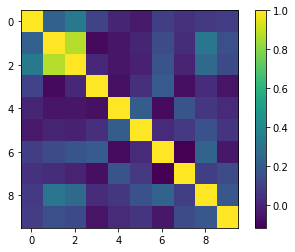

In [13]:
plt.imshow(bank_of_america.iloc[:,1:].corr());
plt.colorbar();

- Les 2 variables VALUE et MORTDUE sont fortement correlées (0.88) donc on doit enlever l'une de ces 2 variables (On enlève MORTDUE)

# Feature Engineering

In [14]:
bank_of_america.isna().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

### Gestion des valeurs manquantes + Encoding + Rescaling + Classification (avec Pipelines)

In [15]:
X = bank_of_america.drop(['BAD','MORTDUE'], axis=1)
y = bank_of_america['BAD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [16]:
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier()
    ]
imputerStrategies = [
    'median','most_frequent','mean'
]
rescalers = [
    MinMaxScaler(),
    StandardScaler()
]

In [17]:
sc = []
for classifier in classifiers:
    for strat in imputerStrategies:
        for rescaler in rescalers:
            # Imputers + Rescaling
            numeric_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy=strat)),
                ('scaler', rescaler)])
            categorical_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])
            
            preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                    ('cat', categorical_transformer, categorical_features)])
            
            # Classification
            pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', classifier)])
            pipe.fit(X_train, y_train)
            # Score
            sc.append([str(classifier),strat,str(rescaler),pipe.score(X_test, y_test)])

In [18]:
scores = pd.DataFrame(sc,columns=['classifier','imputer strategy', 'rescaler', 'f1-score'])
scores.sort_values(by=['f1-score'],ascending=False).head()

,classifier,imputer strategy,rescaler,f1-score
7,"RandomForestClassifier(bootstrap=True, ccp_alp...",median,"StandardScaler(copy=True, with_mean=True, with...",0.918624
10,"RandomForestClassifier(bootstrap=True, ccp_alp...",mean,"MinMaxScaler(copy=True, feature_range=(0, 1))",0.916107
6,"RandomForestClassifier(bootstrap=True, ccp_alp...",median,"MinMaxScaler(copy=True, feature_range=(0, 1))",0.915268
11,"RandomForestClassifier(bootstrap=True, ccp_alp...",mean,"StandardScaler(copy=True, with_mean=True, with...",0.914430
8,"RandomForestClassifier(bootstrap=True, ccp_alp...",most_frequent,"MinMaxScaler(copy=True, feature_range=(0, 1))",0.901007


- Comme ils nous donnent la meilleure f1-score, on choisit Median Imputer strategy et Standard Scaler dans notre Feature Engineering

### Gestion des valeurs manquantes
- Median Imputer pour les valeurs quantitatives et Classification pour les valeurs qualitatives

In [19]:
bank_of_america_num = bank_of_america.drop(columns=["REASON","JOB","BAD","MORTDUE"])
imr = SimpleImputer(strategy="median")
matrice = imr.fit_transform(bank_of_america_num.values)
bank_of_america_fitted = pd.DataFrame(matrice,columns=bank_of_america_num.columns)
bank_of_america_fitted = bank_of_america_fitted.join(bank_of_america[["REASON","JOB"]])

In [20]:
print(bank_of_america_fitted.REASON.unique(),bank_of_america_fitted.JOB.unique())

['HomeImp' nan 'DebtCon'] ['Other' nan 'Office' 'Sales' 'Mgr' 'ProfExe' 'Self']


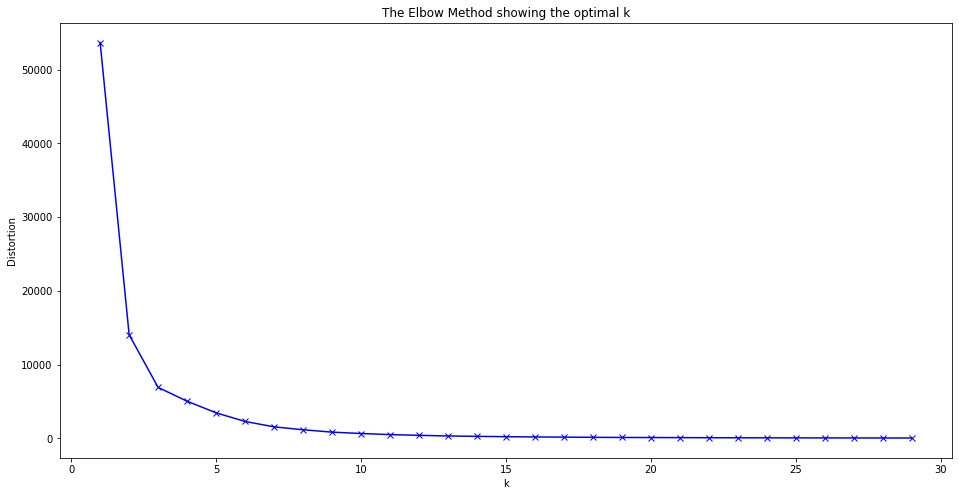

In [39]:
ss= StandardScaler()
matrix=ss.fit_transform(bank_of_america_fitted.drop(columns=["REASON","JOB"]).values.reshape(-1,1))
distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(matrix)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [40]:
bank_of_america_fitted.drop(columns=["REASON","JOB"])

,LOAN,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1100.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262
1,1300.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262
2,1500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262
3,1500.0,89235.5,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262
4,1700.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262
...,...,...,...,...,...,...,...,...,...
5955,88900.0,90185.0,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,89000.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,89200.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,89800.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [41]:
matrix

array([[-0.3306818 ],
       [ 0.69082499],
       [-0.3600274 ],
       ...,
       [-0.36031021],
       [-0.35987925],
       [-0.35937903]])

- On choisit k=2

In [42]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(bank_of_america_fitted.iloc[:,:-2])
pd.crosstab(bank_of_america_fitted.iloc[:,-2],kmeans.labels_)

col_0,0,1
REASON,,
DebtCon,3409,720
HomeImp,1475,356


In [43]:
kmeans.labels_ == 0

array([ True,  True,  True, ...,  True,  True,  True])

In [44]:
bank_of_america_fitted.loc[(bank_of_america_fitted["REASON"]!=bank_of_america_fitted["REASON"]) & (np.array(kmeans.labels_) == 0), "REASON" ] = "DebtCon"
bank_of_america_fitted.loc[(bank_of_america_fitted["REASON"]!=bank_of_america_fitted["REASON"]) & (np.array(kmeans.labels_) == 1), "REASON" ] = "HomeImp"

In [45]:
pd.crosstab(bank_of_america_fitted.iloc[:,-1],kmeans.labels_)

col_0,0,1
JOB,,
Mgr,580,187
Office,834,114
Other,2432,213
ProfExe,844,454
Sales,87,22
Self,107,86


In [46]:
bank_of_america_fitted.loc[(bank_of_america_fitted["JOB"]!=bank_of_america_fitted["JOB"]) & (np.array(kmeans.labels_) == 0), "JOB"] = "Other"
bank_of_america_fitted.loc[(bank_of_america_fitted["JOB"]!=bank_of_america_fitted["JOB"]) & (np.array(kmeans.labels_) == 1), "JOB"] = "ProfExe"

In [47]:
print(bank_of_america_fitted.REASON.unique(),bank_of_america_fitted.JOB.unique())

['HomeImp' 'DebtCon'] ['Other' 'Office' 'Sales' 'Mgr' 'ProfExe' 'Self']


### Encodage

In [48]:
bank_of_america_final = bank_of_america_fitted.drop(columns=["REASON","JOB"])

In [49]:
oneHotEncoder = OneHotEncoder()
mat = oneHotEncoder.fit_transform(bank_of_america_fitted["REASON"].values.reshape(-1,1))
df = pd.DataFrame(mat.toarray(),columns=oneHotEncoder.categories_[0],index=bank_of_america_fitted.index)
df = df.drop(columns=["HomeImp"])
bank_of_america_final =  pd.concat([bank_of_america_final,df],axis=1)

In [50]:
oneHotEncoder = OneHotEncoder()
mat = oneHotEncoder.fit_transform(bank_of_america_fitted["JOB"].values.reshape(-1,1))
df = pd.DataFrame(mat.toarray(),columns=oneHotEncoder.categories_[0],index=bank_of_america_fitted.index)
df = df.drop(columns=["Other"])
bank_of_america_final =  pd.concat([bank_of_america_final,df],axis=1)

In [51]:
bank_of_america_final

,LOAN,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,DebtCon,Mgr,Office,ProfExe,Sales,Self
0,1100.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262,0.0,0.0,0.0,0.0,0.0,0.0
1,1300.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262,0.0,0.0,0.0,0.0,0.0,0.0
2,1500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262,0.0,0.0,0.0,0.0,0.0,0.0
3,1500.0,89235.5,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262,1.0,0.0,0.0,0.0,0.0,0.0
4,1700.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,88900.0,90185.0,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347,1.0,0.0,0.0,0.0,0.0,0.0
5956,89000.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971,1.0,0.0,0.0,0.0,0.0,0.0
5957,89200.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590,1.0,0.0,0.0,0.0,0.0,0.0
5958,89800.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882,1.0,0.0,0.0,0.0,0.0,0.0


### Rescaling
- On fait le rescaling avec StandardScaler comme il est le plus adéquat pour notre dataset, de plus StandardScaler nous aide à centrer et réduire les variables pour réaliser une ACP normée

In [52]:
ss = StandardScaler()
bank_of_america_toEncode = bank_of_america_final.drop(columns=["DebtCon","Mgr","Office","ProfExe","Sales","Self"])
ssr = ss.fit_transform(bank_of_america_toEncode)
bank_of_america_rescaled = pd.DataFrame(ssr,columns=bank_of_america_toEncode.columns)
bank_of_america_rescaled = bank_of_america_rescaled.join(bank_of_america_final[["DebtCon","Mgr","Office","ProfExe","Sales","Self"]])
bank_of_america_rescaled = bank_of_america_rescaled.join(bank_of_america[["BAD"]])
bank_of_america_rescaled

,LOAN,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,DebtCon,Mgr,Office,ProfExe,Sales,Self,BAD
0,-1.562299,-1.099371,0.240237,-0.280976,-0.375943,-1.018026,-0.102879,-1.230878,0.106963,0.0,0.0,0.0,0.0,0.0,0.0,1
1,-1.544453,-0.582794,-0.241936,-0.280976,1.477341,-0.689350,-0.707574,-0.728389,0.106963,0.0,0.0,0.0,0.0,0.0,0.0,1
2,-1.526606,-1.491970,-0.655226,-0.280976,-0.375943,-0.358680,-0.102879,-1.130380,0.106963,0.0,0.0,0.0,0.0,0.0,0.0,1
3,-1.526606,-0.216389,-0.241936,-0.280976,-0.375943,-0.071488,-0.102879,-0.125403,0.106963,1.0,0.0,0.0,0.0,0.0,0.0,1
4,-1.508759,0.183939,-0.792990,-0.280976,-0.375943,-1.030391,-0.707574,-0.728389,0.106963,0.0,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,6.272411,-0.199691,0.997936,-0.280976,-0.375943,0.506990,-0.707574,-0.527394,0.276259,1.0,0.0,0.0,0.0,0.0,0.0,0
5956,6.281335,-0.151296,0.997936,-0.280976,-0.375943,0.350032,-0.707574,-0.627892,0.243243,1.0,0.0,0.0,0.0,0.0,0.0,0
5957,6.299181,-0.151524,0.860173,-0.280976,-0.375943,0.392963,-0.707574,-0.627892,0.203553,1.0,0.0,0.0,0.0,0.0,0.0,0
5958,6.352722,-0.170218,0.722409,-0.280976,-0.375943,0.412264,-0.707574,-0.527394,0.044510,1.0,0.0,0.0,0.0,0.0,0.0,0


### Test+Train

In [53]:
X = bank_of_america_rescaled.drop('BAD', axis=1)
y = bank_of_america_rescaled['BAD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Feature Selection / Dimension Reduction

## ACP

In [54]:
# Calcul des composantes principales
# Le nombre de composantes (K) n’étant pas spécifié, il est par défaut égal au nombre de variables (K = p)
pca = PCA(svd_solver='full')
coord = pca.fit_transform(X)
coord

array([[-2.29674864, -0.10264205,  0.14548459, ...,  0.17114527,
        -0.0484184 , -0.02797704],
       [-1.48611218,  0.31602248,  1.13708545, ...,  0.23912464,
        -0.08322294, -0.0438831 ],
       [-2.35417065, -0.00998297,  0.14168288, ...,  0.15325553,
        -0.04366922, -0.03148005],
       ...,
       [ 2.49810262, -1.40950812, -2.13219455, ...,  0.10973436,
        -0.20134602, -0.00670832],
       [ 2.50570198, -1.41201608, -2.13207945, ...,  0.1121635 ,
        -0.2050639 , -0.00707506],
       [ 2.54139057, -1.46461647, -2.05102308, ...,  0.10926488,
        -0.20162475, -0.00594359]])

In [55]:
pca.n_components_

15

In [56]:
pca.explained_variance_

array([1.688671  , 1.40155832, 1.17003945, 0.9907769 , 0.91784797,
       0.84963147, 0.76851787, 0.66596275, 0.59330368, 0.19678186,
       0.1754031 , 0.13963959, 0.07773199, 0.02720514, 0.01691981])

In [57]:
pca.explained_variance_ratio_

array([0.17444965, 0.14478922, 0.12087196, 0.10235308, 0.09481909,
       0.08777193, 0.07939242, 0.06879787, 0.06129176, 0.02032872,
       0.01812017, 0.01442559, 0.00803017, 0.00281045, 0.00174792])

In [58]:
#nombre d'observations
n = X.shape[0]
#nombre de variables
p = X.shape[1]
eig = eigval = (n-1)/n*pca.explained_variance_
eigval

array([1.68838767, 1.40132316, 1.16984314, 0.99061066, 0.91769397,
       0.84948892, 0.76838892, 0.66585101, 0.59320413, 0.19674884,
       0.17537367, 0.13961616, 0.07771894, 0.02720057, 0.01691697])

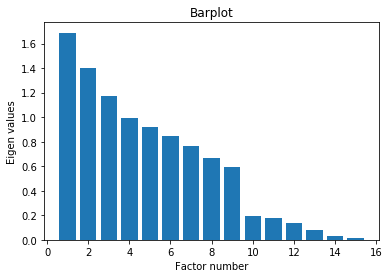

In [59]:
# barplot des valeurs propres
plt.bar(np.arange(1,p+1),eigval);
plt.title("Barplot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

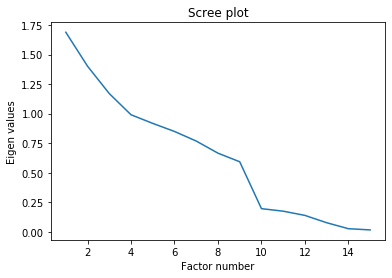

In [60]:
#scree plot
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

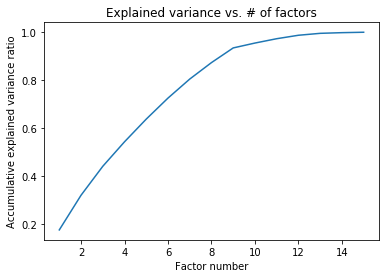

array([0.17444965, 0.31923887, 0.44011083, 0.54246391, 0.637283  ,
       0.72505493, 0.80444735, 0.87324522, 0.93453698, 0.9548657 ,
       0.97298587, 0.98741146, 0.99544163, 0.99825208, 1.        ])

In [61]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Accumulative explained variance ratio")
plt.xlabel("Factor number")
plt.show()
np.cumsum(pca.explained_variance_ratio_)

- D'après le critère de coude, on préserve 4 composantes principales (axes)
- Ensemble, il explique 54.23% de l'information

### Analyse des individus

In [62]:
#contribution des individus dans l'inertie totale
di = np.sum(X**2,axis=1)
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di
#contributions aux axes
ctr = coord**2
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigval[j])

pd.DataFrame({'Inertie':di,'COS2_D1':cos2[:,0],'COS2_D2':cos2[:,1],'COS2_D3':cos2[:,2],'COS2_D4':cos2[:,3],
              'Contrib_D1':ctr[:,0],'Contrib_D2':ctr[:,1],'Contrib_D3':ctr[:,2],'Contrib_D4':ctr[:,3]})

,Inertie,COS2_D1,COS2_D2,COS2_D3,COS2_D4,Contrib_D1,Contrib_D2,Contrib_D3,Contrib_D4
0,6.500853,0.811440,0.001621,0.003256,0.021646,0.000524,1.261438e-06,0.000003,0.000024
1,6.562856,0.336520,0.015217,0.197012,0.121574,0.000219,1.195780e-05,0.000185,0.000135
2,6.634539,0.835344,0.000015,0.003026,0.113768,0.000551,1.193259e-08,0.000003,0.000128
3,3.699025,0.238645,0.002073,0.006743,0.304221,0.000088,9.181086e-07,0.000004,0.000191
4,6.263660,0.394892,0.001450,0.037796,0.179462,0.000246,1.087805e-06,0.000034,0.000190
...,...,...,...,...,...,...,...,...,...
5955,42.711342,0.158148,0.048780,0.095125,0.316730,0.000671,2.494579e-04,0.000583,0.002291
5956,42.770812,0.147184,0.047335,0.102795,0.330524,0.000626,2.424064e-04,0.000631,0.002394
5957,42.753587,0.145965,0.046469,0.106336,0.324252,0.000620,2.378760e-04,0.000652,0.002348
5958,43.078951,0.145745,0.046282,0.105522,0.320989,0.000624,2.387233e-04,0.000652,0.002342


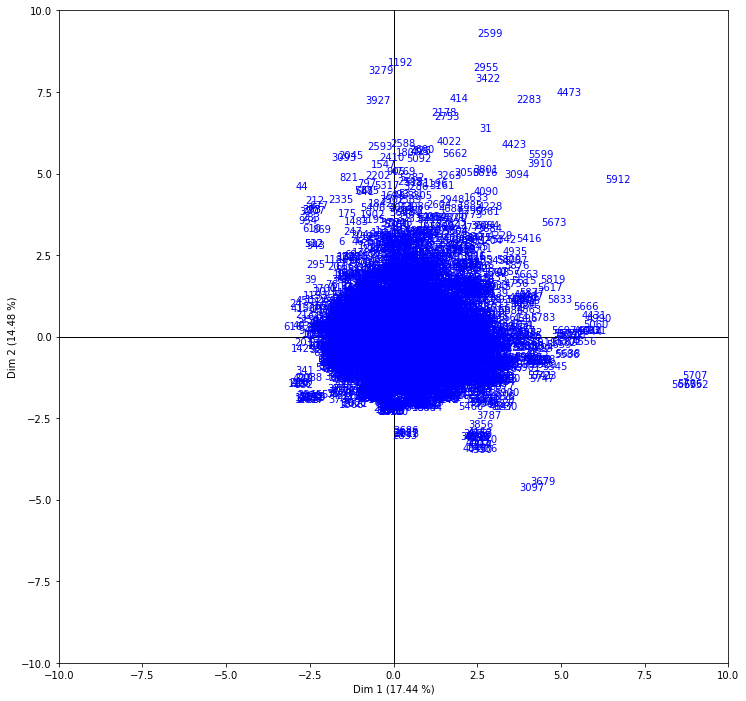

In [63]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-10,10) #même limites en abscisse
axes.set_ylim(-10,10) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]),color='blue')
#ajouter les axes
plt.plot([-10,10],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-10,10],color='black',linestyle='-',linewidth=1)
#affichage
plt.xlabel("Dim 1 (%0.2f %%)"% (pca.explained_variance_ratio_[0]*100))
plt.ylabel("Dim 2 (%0.2f %%)"% (pca.explained_variance_ratio_[1]*100))
plt.show()

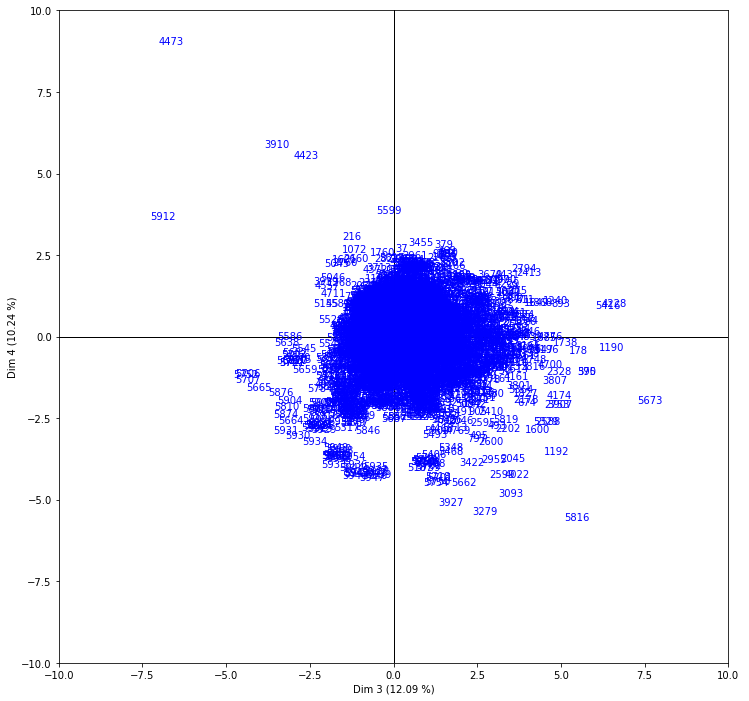

In [64]:
#positionnement des individus dans le deuxième plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-10,10) #même limites en abscisse
axes.set_ylim(-10,10) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(X.index[i],(coord[i,2],coord[i,3]),color='blue')
#ajouter les axes
plt.plot([-10,10],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-10,10],color='black',linestyle='-',linewidth=1)
#affichage
plt.xlabel("Dim 3 (%0.2f %%)"% (pca.explained_variance_ratio_[2]*100))
plt.ylabel("Dim 4 (%0.2f %%)"% (pca.explained_variance_ratio_[3]*100))
plt.show()

### Analyse des variables

In [65]:
# Matrice de Corrélation
sqrt_eigval = np.sqrt(eigval)
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
#cosinus carré des variables (qualité de représentation)
cos2var = corvar**2
#contributions
ctrvar = cos2var
for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]

    
pd.DataFrame({'id':X.columns,'COR_D1':corvar[:,0],'COR_D2':corvar[:,1], 'COR_D3':corvar[:,2],'COR_D4':corvar[:,3],
              'COS2_D1':cos2var[:,0],'COS2_D2':cos2var[:,1], 'COS2_D3':cos2var[:,2],'COS2_D4':cos2var[:,3],
              'Contrib_D1':ctrvar[:,0],'Contrib_D2':ctrvar[:,1],'Contrib_D3':ctrvar[:,2],'Contrib_D4':ctrvar[:,3]})

,id,COR_D1,COR_D2,COR_D3,COR_D4,COS2_D1,COS2_D2,COS2_D3,COS2_D4,Contrib_D1,Contrib_D2,Contrib_D3,Contrib_D4
0,LOAN,0.544265,-0.068476,-0.389236,-0.557241,0.175448,0.003346,1.295088e-01,0.313461,0.175448,0.003346,1.295088e-01,0.313461
1,VALUE,0.707477,-0.072662,-0.326627,-0.032036,0.296451,0.003768,9.119629e-02,0.001036,0.296451,0.003768,9.119629e-02,0.001036
2,YOJ,0.245731,-0.364634,0.422143,-0.401487,0.035764,0.094880,1.523319e-01,0.162720,0.035764,0.094880,1.523319e-01,0.162720
3,DEROG,0.001943,0.586886,0.276291,-0.392398,0.000002,0.245793,6.525387e-02,0.155436,0.000002,0.245793,6.525387e-02,0.155436
4,DELINQ,0.188010,0.407422,0.614091,-0.008535,0.020936,0.118454,3.223574e-01,0.000074,0.020936,0.118454,3.223574e-01,0.000074
5,CLAGE,0.512871,-0.400346,0.361754,0.153511,0.155791,0.114375,1.118663e-01,0.023789,0.155791,0.114375,1.118663e-01,0.023789
6,NINQ,0.079992,0.612232,-0.148082,-0.205597,0.003790,0.267482,1.874471e-02,0.042671,0.003790,0.267482,1.874471e-02,0.042671
7,CLNO,0.652742,0.209507,0.209358,0.377369,0.252354,0.031323,3.746705e-02,0.143757,0.252354,0.031323,3.746705e-02,0.143757
8,DEBTINC,0.299831,0.403801,-0.282891,0.391538,0.053245,0.116358,6.840849e-02,0.154755,0.053245,0.116358,6.840849e-02,0.154755
9,DebtCon,0.030843,0.055971,-0.054546,-0.025420,0.000563,0.002236,2.543346e-03,0.000652,0.000563,0.002236,2.543346e-03,0.000652


In [66]:
#corrélation de la cible avec les axes factoriels
corSupp = np.zeros((1,p))
for k in range(p):
    corSupp[0,k] = np.corrcoef(y,coord[:,k])[0,1]
corSupp

array([[-0.02581936,  0.39925393,  0.15105827, -0.04708769,  0.0221819 ,
         0.15603565, -0.04902206,  0.01979639,  0.10981595,  0.03126399,
        -0.03013582, -0.03961081,  0.05201987,  0.01527275,  0.04692276]])

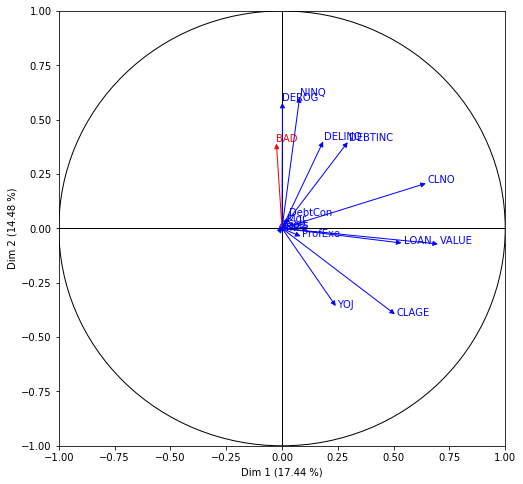

In [67]:
#cercle des corrélations de premier plan
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des variables actives
for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]),color='blue')
    plt.annotate("",
              xy=(0, 0), xycoords='data',
              xytext=(corvar[j,0],corvar[j,1]), textcoords='data',
              arrowprops=dict(color='blue',arrowstyle='<|-',
                              connectionstyle="arc3,rad=0."), 
              )
#affiche des variables illustratives (y)
plt.annotate('BAD',(corSupp[0,0],corSupp[0,1]),color='red')
plt.annotate("",
              xy=(0, 0), xycoords='data',
              xytext=(corSupp[0,0],corSupp[0,1]), textcoords='data',
              arrowprops=dict(color='red',arrowstyle='<|-',
                              connectionstyle="arc3,rad=0."), 
              )
#ajouter les axes
plt.plot([-1,1],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='black',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='black',fill=False)
axes.add_artist(cercle)
#affichage
plt.xlabel("Dim 1 (%0.2f %%)"% (pca.explained_variance_ratio_[0]*100))
plt.ylabel("Dim 2 (%0.2f %%)"% (pca.explained_variance_ratio_[1]*100))
plt.show()

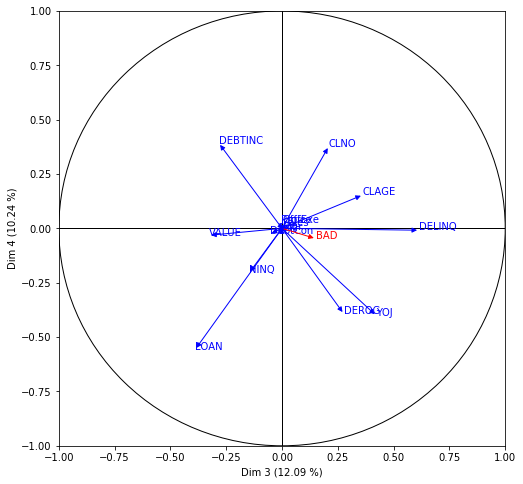

In [68]:
#cercle des corrélations de deuxième plan
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des variables actives
for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,2],corvar[j,3]),color='blue')
    plt.annotate("",
              xy=(0, 0), xycoords='data',
              xytext=(corvar[j,2],corvar[j,3]), textcoords='data',
              arrowprops=dict(color='blue',arrowstyle='<|-',
                              connectionstyle="arc3,rad=0."), 
              )
#affiche des variables illustratives (y)
plt.annotate('BAD',(corSupp[0,2],corSupp[0,3]),color='red')
plt.annotate("",
              xy=(0, 0), xycoords='data',
              xytext=(corSupp[0,2],corSupp[0,3]), textcoords='data',
              arrowprops=dict(color='red',arrowstyle='<|-',
                              connectionstyle="arc3,rad=0."), 
              )
#ajouter les axes
plt.plot([-1,1],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='black',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='black',fill=False)
axes.add_artist(cercle)
#affichage
plt.xlabel("Dim 3 (%0.2f %%)"% (pca.explained_variance_ratio_[2]*100))
plt.ylabel("Dim 4 (%0.2f %%)"% (pca.explained_variance_ratio_[3]*100))
plt.show()

- Interprétation des variables :

Toutes les variables actives sauf 'Derog' sont de même côté de la première composante (corrélation positive).
On note que les variables 'CLNO' (nombre de crédits) et 'Value' (valeur de la propriété) sont plus étroitement liées que les autres : Ils représentent le mieux la première dimension (car ils sont presque confondus avec cette axe / forte corrélation). On peut déduire que la première composante représente la valeur de la propriété. On peut ainsi conclure que les individus situés à droite de l'axe ont des propriétés à prix elevé et les individus situés à gauche de l'axe ont des propriétés à prix réduit.

Concernant la 2eme composante, elle oppose les variables 'Derog' (Nombre de rapports dérogatoires majeurs) et 'Ninq' (Nombre de lignes de crédit récentes) qui sont corrélées positivement avec l'axe aux variables 'Yoj' (Années à l'emploi actuel) et 'Clage' (Âge de la ligne commerciale la plus ancienne en mois) qui sont corrélées négativement. Donc on peut déduire que cette axe représente l'historique d'endettement du client avec les valeurs positives représentant un mauvais record et les valeurs négatives représentent un bon record.

Concernant la troisième axe, elle est corrélée positivement avec la variable 'DELINQ' (représentant le nombre de crédits impayés). Donc on peut déduire que cette axe représente le crédit impayé.

Concernant la quatrième axe, elle est corrélée négativement avec la variable 'LOAN' (représentant la valeur de crédit). Donc on peut déduire que cette axe représente le montant de crédit.

- Interprétation conjointe :

Les axes peuvent etre résumes par 4 variables synthétiques :La valeur de la propriété et le record du client.

On remarque de plus que notre cible 'BAD' (qui représente si le client est en défaut de prêt ou non) est corrélés positivement avec La 2eme axe. En effet, Les client ont tendance à faire défault si ils ont un mauvais record (grand nombre de lignes de crédit / plusieurs rapports déragatoires). D'autre, le défaut en prêt est indépendantes (orthogonales dans le cercle de corrélation) par rapport la valeur de la propriété.

A partir de ces 4 variables, on peut organiser les clients en 2 catégories selon la topologie suivante:

Clients qui ont une tendance à faire défault caractérisées par un mauvais record

Clients qui ont une tendance à ne pas faire défault caractérisées par un bon record

In [69]:
X2 = pd.DataFrame(data=coord[:,0:4],columns=['ValeurPropriété','Record','CreditImpayé','MontantCrédit'])
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2)

### SVD

- Truncated SVD va nous donner des résultats similaires à PCA

In [70]:
svd = TruncatedSVD(n_components=p-1)
coord2 = svd.fit_transform(X)
coord2

array([[-2.26234041e+00, -6.09525309e-02,  9.64754837e-02, ...,
        -2.31662539e-03,  2.86936303e-02,  5.91038604e-02],
       [-1.45388436e+00,  3.44061091e-01,  1.09726555e+00, ...,
        -3.70279850e-02, -4.97758968e-02,  2.79769603e-02],
       [-2.31907654e+00,  3.23203791e-02,  9.27224407e-02, ...,
        -2.88784033e-02,  5.54745685e-02,  6.43682357e-02],
       ...,
       [ 2.55398029e+00, -1.34892923e+00, -2.23027158e+00, ...,
        -3.23691567e-02, -3.44109516e-02, -1.44675368e-01],
       [ 2.56183277e+00, -1.35101064e+00, -2.23159316e+00, ...,
        -3.63438838e-02, -3.20302779e-02, -1.46320416e-01],
       [ 2.59703676e+00, -1.40434242e+00, -2.15118868e+00, ...,
        -3.41944046e-02, -2.99985933e-02, -1.43570297e-01]])

In [71]:
svd.n_components

14

In [72]:
svd.explained_variance_

array([1.68731694, 1.40005217, 1.16587685, 0.99003446, 0.91722602,
       0.82232164, 0.56875813, 0.48886593, 0.66173068, 0.52571838,
       0.17561038, 0.1415938 , 0.08617356, 0.02989911])

In [73]:
svd.explained_variance_ratio_

array([0.17433902, 0.1446579 , 0.12046215, 0.10229355, 0.09477074,
       0.08496492, 0.05876592, 0.0505112 , 0.06837214, 0.05431891,
       0.01814463, 0.01462993, 0.00890373, 0.00308927])

In [74]:
eigval = (n-1)/n*(svd.explained_variance_)
eigval

array([1.68703383, 1.39981726, 1.16568123, 0.98986835, 0.91707212,
       0.82218367, 0.5686627 , 0.4887839 , 0.66161966, 0.52563017,
       0.17558092, 0.14157004, 0.0861591 , 0.02989409])

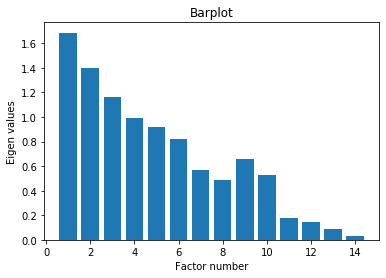

In [75]:
# barplot des valeurs propres
plt.bar(np.arange(1,p),eigval);
plt.title("Barplot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

- On utilisant le critère de coude, on sélectionne les 2 premiers axes

### Analyse des individus

In [76]:
#contribution des individus dans l'inertie totale
di = np.sum(X**2,axis=1)
#qualité de représentation des individus - COS2
cos2 = coord2**2
for j in range(p-1):
    cos2[:,j] = cos2[:,j]/di
#contributions aux axes
ctr = coord2**2
for j in range(p-1):
    ctr[:,j] = ctr[:,j]/(n*eigval[j])

pd.DataFrame({'Inertie':di,'COS2_D1':cos2[:,0],'COS2_D2':cos2[:,1], 'COS2_D3':cos2[:,2],'COS2_D4':cos2[:,3],
              'Contrib_D1':ctr[:,0],'Contrib_D2':ctr[:,1],'Contrib_D3':ctr[:,2],'Contrib_D4':ctr[:,3]})

,Inertie,COS2_D1,COS2_D2,COS2_D3,COS2_D4,Contrib_D1,Contrib_D2,Contrib_D3,Contrib_D4
0,6.500853,0.787310,0.000571,0.001432,0.020387,0.000509,4.453135e-07,1.339701e-06,0.000022
1,6.562856,0.322082,0.018038,0.183455,0.117739,0.000210,1.418906e-05,1.732995e-04,0.000131
2,6.634539,0.810624,0.000157,0.001296,0.110260,0.000535,1.252089e-07,1.237496e-06,0.000124
3,3.699025,0.210422,0.000174,0.000949,0.283401,0.000077,7.726451e-08,5.052741e-07,0.000178
4,6.263660,0.375262,0.000391,0.045792,0.175880,0.000234,2.936274e-07,4.128513e-05,0.000187
...,...,...,...,...,...,...,...,...,...
5955,42.711342,0.164949,0.044866,0.104608,0.319313,0.000701,2.296904e-04,6.431043e-04,0.002312
5956,42.770812,0.153789,0.043413,0.112638,0.333039,0.000654,2.225624e-04,6.934345e-04,0.002414
5957,42.753587,0.152568,0.042560,0.116344,0.326772,0.000649,2.181025e-04,7.159611e-04,0.002368
5958,43.078951,0.152348,0.042369,0.115602,0.323704,0.000653,2.187761e-04,7.168099e-04,0.002364


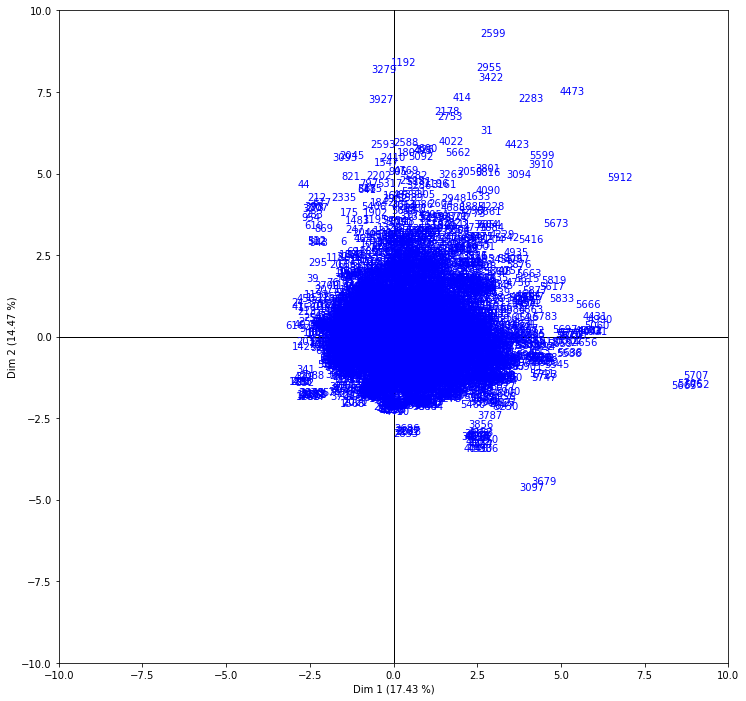

In [77]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-10,10) #même limites en abscisse
axes.set_ylim(-10,10) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(X.index[i],(coord2[i,0],coord2[i,1]),color='blue')
#ajouter les axes
plt.plot([-10,10],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-10,10],color='black',linestyle='-',linewidth=1)
#affichage
plt.xlabel("Dim 1 (%0.2f %%)"% (svd.explained_variance_ratio_[0]*100))
plt.ylabel("Dim 2 (%0.2f %%)"% (svd.explained_variance_ratio_[1]*100))
plt.show()

### Analyse des variables

In [78]:
# Matrice de Corrélation
sqrt_eigval = np.sqrt(eigval)
corvar2 = np.zeros((p,p))
for k in range(p-1):
    corvar2[:,k] = svd.components_[k,:] * sqrt_eigval[k]
#cosinus carré des variables (qualité de représentation)
cos2var = corvar2**2
#contributions
ctrvar = cos2var
for k in range(p-1):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]

    
pd.DataFrame({'id':X.columns,'COR_D1':corvar2[:,0],'COR_D2':corvar2[:,1], 'COR_D3':corvar2[:,2],'COR_D4':corvar2[:,3],
              'COS2_D1':cos2var[:,0],'COS2_D2':cos2var[:,1], 'COS2_D3':cos2var[:,2],'COS2_D4':cos2var[:,3],
              'Contrib_D1':ctrvar[:,0],'Contrib_D2':ctrvar[:,1],'Contrib_D3':ctrvar[:,2],'Contrib_D2':ctrvar[:,4]})


,id,COR_D1,COR_D2,COR_D3,COR_D4,COS2_D1,COS2_D2,COS2_D3,COS2_D4,Contrib_D1,Contrib_D2,Contrib_D3
0,LOAN,0.544812,-0.067964,-0.387475,-0.554154,0.175942,0.003300,1.287977e-01,0.310230,0.175942,0.000778,1.287977e-01
1,VALUE,0.705963,-0.076052,-0.317773,-0.027393,0.295420,0.004132,8.662715e-02,0.000758,0.295420,0.077871,8.662715e-02
2,YOJ,0.242316,-0.368549,0.416930,-0.402535,0.034805,0.097033,1.491237e-01,0.163693,0.034805,0.389192,1.491237e-01
3,DEROG,0.003346,0.582969,0.282251,-0.390810,0.000007,0.242783,6.834240e-02,0.154296,0.000007,0.113864,6.834240e-02
4,DELINQ,0.187615,0.400744,0.616317,-0.010382,0.020865,0.114726,3.258579e-01,0.000109,0.020865,0.002136,3.258579e-01
5,CLAGE,0.508671,-0.405984,0.359724,0.151254,0.153373,0.117746,1.110094e-01,0.023112,0.153373,0.005579,1.110094e-01
6,NINQ,0.083471,0.612199,-0.142651,-0.204894,0.004130,0.267741,1.745704e-02,0.042411,0.004130,0.102466,1.745704e-02
7,CLNO,0.652919,0.204824,0.210788,0.374038,0.252694,0.029970,3.811657e-02,0.141336,0.252694,0.011321,3.811657e-02
8,DEBTINC,0.300711,0.400937,-0.268411,0.398434,0.053601,0.114837,6.180472e-02,0.160374,0.053601,0.287746,6.180472e-02
9,DebtCon,0.063327,0.091802,-0.118257,-0.050310,0.002377,0.006021,1.199695e-02,0.002557,0.002377,0.000079,1.199695e-02


In [79]:
#corrélation de la cible avec les axes factoriels
corSupp2 = np.zeros((1,p-1))
for k in range(p-1):
    corSupp2[0,k] = np.corrcoef(y,coord2[:,k])[0,1]
corSupp2

array([[-0.02520323,  0.39718947,  0.15782071, -0.04547168,  0.02459708,
         0.16308955,  0.03347614, -0.07762276,  0.00989805,  0.09750298,
        -0.03296291, -0.03373069, -0.02736022,  0.0399378 ]])

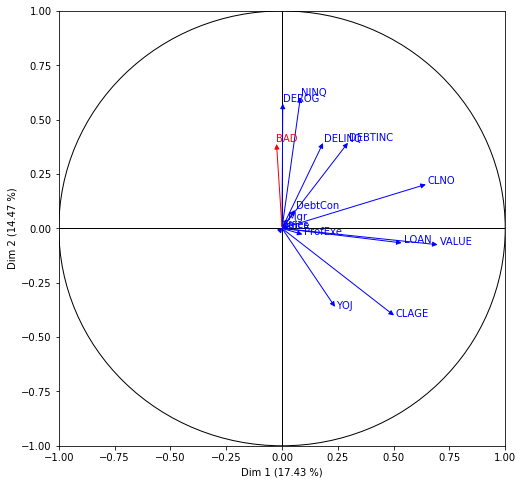

In [80]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des variables actives
for j in range(p-1):
    plt.annotate(X.columns[j],(corvar2[j,0],corvar2[j,1]),color='blue')
    plt.annotate("",
              xy=(0, 0), xycoords='data',
              xytext=(corvar2[j,0],corvar2[j,1]), textcoords='data',
              arrowprops=dict(color='blue',arrowstyle='<|-',
                              connectionstyle="arc3,rad=0."), 
              )
#affiche des variables illustratives (y)
plt.annotate('BAD',(corSupp2[0,0],corSupp2[0,1]),color='red')
plt.annotate("",
              xy=(0, 0), xycoords='data',
              xytext=(corSupp2[0,0],corSupp2[0,1]), textcoords='data',
              arrowprops=dict(color='red',arrowstyle='<|-',
                              connectionstyle="arc3,rad=0."), 
              )
#ajouter les axes
plt.plot([-1,1],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='black',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='black',fill=False)
axes.add_artist(cercle)
#affichage
plt.xlabel("Dim 1 (%0.2f %%)"% (svd.explained_variance_ratio_[0]*100))
plt.ylabel("Dim 2 (%0.2f %%)"% (svd.explained_variance_ratio_[1]*100))
plt.show()

# Clustering (Unsupervised)

### KMeans

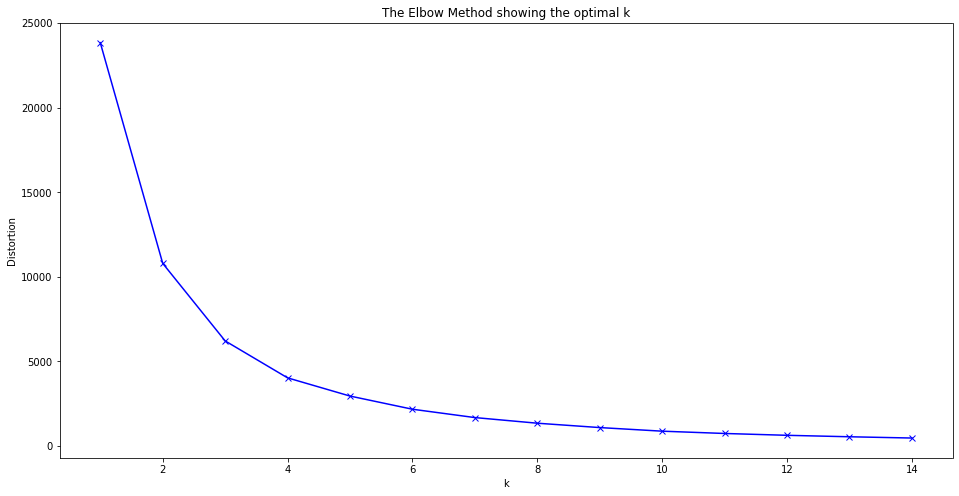

In [81]:
ss2= StandardScaler()
matrix2=ss2.fit_transform(X2.values.reshape(-1,1))
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(matrix2)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

- On choisit K=2

In [82]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X2)
pd.crosstab(y,kmeans.labels_)

col_0,0,1
BAD,,
0,1855,2916
1,376,813


- La distribution de cluster 1 (default) est entre -3 et 1 et la distribution de cluster 0 (Pas de Default) est entre 0 et 4 pour la variable ValeurPropriété
- => La variable ValeurPropriété est significative et on peut l'utiliser pour segmenter les individus

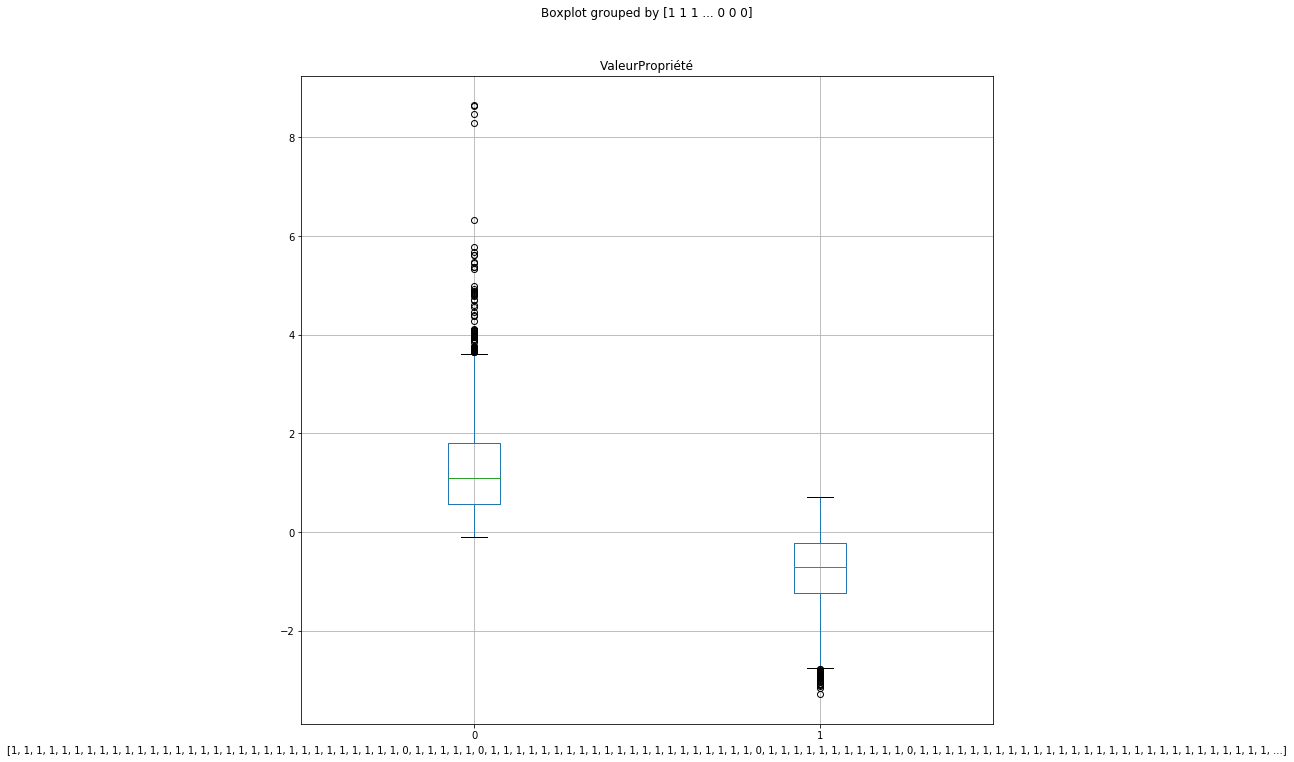

In [83]:
X2.boxplot(column=['ValeurPropriété'],by=kmeans.labels_,figsize=(12,12));

In [84]:
adjusted_rand_score(y,kmeans.labels_)

-0.012237877693988602

### CAH

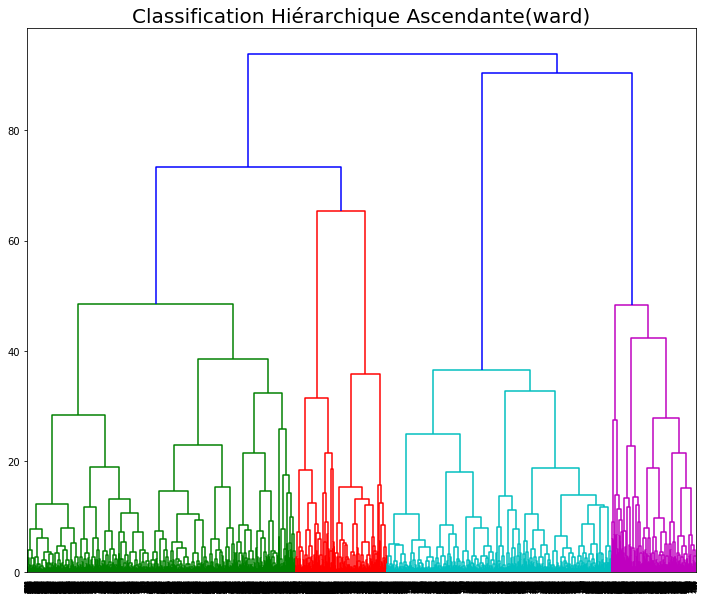

In [85]:
Z = linkage(X2,'ward')
plt.figure(figsize=(12, 10))
plt.title('Classification Hiérarchique Ascendante(ward)', fontsize=20)
d = dendrogram(Z)
plt.show()

On choisit une coupe à distance de 92 pour avoir 2 clusters

In [86]:
clusters = fcluster(Z,criterion='distance', t=92)
clusters = clusters - 1
pd.crosstab(y,clusters)

col_0,0,1
BAD,,
0,2789,1982
1,418,771


- Cluster 1 représente les clients qui fait défault et cluster 0 représente les individus qui ne fait pas défault

In [87]:
adjusted_rand_score(y,clusters)

0.0357574218815207

# Classification (Supervised)

### KNN

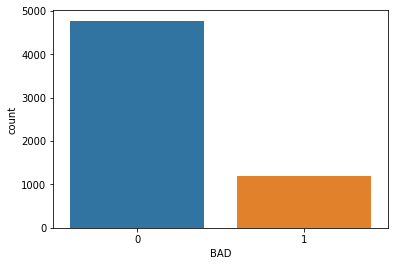

In [88]:
sns.countplot(y,label="BAD")
plt.show()

Text(0, 0.5, 'Erreur')

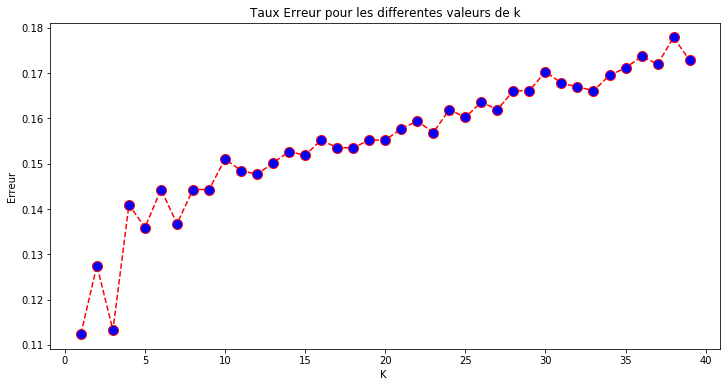

In [71]:
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

- On choisit k=3 (Il est déconseillé de choisir 1)

In [72]:
knn = KNeighborsClassifier(3)
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [73]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.92
Accuracy of K-NN classifier on test set: 0.89


In [74]:
print(confusion_matrix(y_test, y_pred_knn))

[[927  17]
 [118 130]]


- La première classe représente les clients qui ne fait pas défault et la deuxième classe représente les clients qui fait défault

In [75]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       944
           1       0.88      0.52      0.66       248

    accuracy                           0.89      1192
   macro avg       0.89      0.75      0.80      1192
weighted avg       0.89      0.89      0.88      1192



### CART (Arbre de décision)

In [76]:
dtc = DecisionTreeClassifier()
dtc_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)

In [77]:
print('Accuracy of CART classifier on training set: {:.2f}'
     .format(dtc_model.score(X_train, y_train)))
print('Accuracy of CART classifier on test set: {:.2f}'
     .format(dtc_model.score(X_test, y_test)))

Accuracy of CART classifier on training set: 1.00
Accuracy of CART classifier on test set: 0.80


In [78]:
print(confusion_matrix(y_test, y_pred_dtc))

[[831 113]
 [121 127]]


- La première classe représente les clients qui ne fait pas défault et la deuxième classe représente les clients qui fait défault

In [79]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       944
           1       0.53      0.51      0.52       248

    accuracy                           0.80      1192
   macro avg       0.70      0.70      0.70      1192
weighted avg       0.80      0.80      0.80      1192



### Random Forest

In [80]:
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)

C:\Users\Abdallah\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [81]:
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rfc.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rfc.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 0.98
Accuracy of Random Forest classifier on test set: 0.87


In [82]:
print(confusion_matrix(y_test, y_pred_rfc))

[[926  18]
 [137 111]]


- La première classe représente les clients qui ne fait pas défault et la deuxième classe représente les clients qui fait défault

In [83]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       944
           1       0.86      0.45      0.59       248

    accuracy                           0.87      1192
   macro avg       0.87      0.71      0.76      1192
weighted avg       0.87      0.87      0.85      1192



### Comparaison entre les méthodes de classification avec ROC

In [84]:
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_dtc) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_rfc) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_knn)
roc_auc3 = auc(fpr3, tpr3)

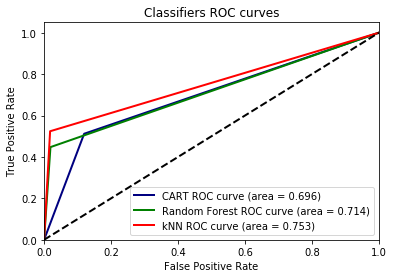

In [85]:
plt.figure() 
plt.plot(fpr1, tpr1, color='navy', lw=2, label='CART ROC curve (area = %0.3f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label='Random Forest ROC curve (area = %0.3f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='red', lw=2, label='kNN ROC curve (area = %0.3f)'% roc_auc3)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

- Plus ROC est élevée, mieux le modèle et donc KNN est le meilleur modèle pour notre dataset

# Déploiement (Dashboarding)

### ACP (Dim 1+2)

In [86]:
f0 = [
    go.Bar(x=np.arange(1,5),y=eig[:4],name='Valeurs propres des axes actives', marker_color='crimson'),
    go.Bar(x=np.arange(5,p+1),y=eig[4:],name='Valeurs propres des axes supp', marker_color='lightslategray')
]
f1 = [  
    go.Scatter(name="Dim 1 (%0.2f %%)"% (pca.explained_variance_ratio_[0]*100),x=[-10,10],y=[0,0],mode="lines",marker=dict(color="black")),
    go.Scatter(name="Dim 1 (%0.2f %%)"% (pca.explained_variance_ratio_[1]*100),x=[0,0],y=[-10,10],mode="lines",marker=dict(color="black")),
    go.Scatter(text=X.index, textposition="middle center",name="Nuage",x=coord[:,0],y=coord[:,1],mode="text")
]
f2 = [
    go.Scatter(name="Dim 1 (%0.2f %%)"% (pca.explained_variance_ratio_[0]*100),x=[-1,1],y=[0,0],mode="lines",marker=dict(color="black")),
    go.Scatter(name="Dim 1 (%0.2f %%)"% (pca.explained_variance_ratio_[1]*100),x=[0,0],y=[-1,1],mode="lines",marker=dict(color="black")),
    go.Scatter(name="Variables actives",text=X.columns,x=corvar[:,0],y=corvar[:,1],mode="markers+text",marker=dict(color='blue')),
    go.Scatter(name="BAD",text="BAD",x=corSupp[:,0],y=corSupp[:,1],mode="markers+text",marker=dict(color='red'))
]

In [87]:
ACPBarPlot = dcc.Graph(figure=go.Figure(data=f0,layout=go.Layout(title="ACP Barplot des valeurs propres",height=800)))
ACPind = dcc.Graph(figure=go.Figure(data=f1,layout=go.Layout(title="ACP Graphe des individus",height=800)))
ACPvar = dcc.Graph(figure=go.Figure(data=f2,layout=go.Layout(shapes=[go.layout.Shape(
            type="circle",
            xref="x",
            yref="y",
            x0=-1,
            y0=-1,
            x1=1,
            y1=1,
            line_color="black",
        )],title="ACP Cercle de corrélation",height=600,width=625)))

### ACP (Dim 3+4)

In [88]:
f3 = [  
    go.Scatter(name="Dim 3 (%0.2f %%)"% (pca.explained_variance_ratio_[2]*100),x=[-10,10],y=[0,0],mode="lines",marker=dict(color="black")),
    go.Scatter(name="Dim 4 (%0.2f %%)"% (pca.explained_variance_ratio_[3]*100),x=[0,0],y=[-10,10],mode="lines",marker=dict(color="black")),
    go.Scatter(text=X.index, textposition="middle center",name="Nuage",x=coord[:,2],y=coord[:,3],mode="text")
]
f4 = [
    go.Scatter(name="Dim 3 (%0.2f %%)"% (pca.explained_variance_ratio_[2]*100),x=[-1,1],y=[0,0],mode="lines",marker=dict(color="black")),
    go.Scatter(name="Dim 4 (%0.2f %%)"% (pca.explained_variance_ratio_[3]*100),x=[0,0],y=[-1,1],mode="lines",marker=dict(color="black")),
    go.Scatter(name="Variables actives",text=X.columns,x=corvar[:,2],y=corvar[:,3],mode="markers+text",marker=dict(color='blue')),
    go.Scatter(name="BAD",text="BAD",x=corSupp[:,2],y=corSupp[:,3],mode="markers+text",marker=dict(color='red'))
]

In [89]:
ACPind2 = dcc.Graph(figure=go.Figure(data=f3,layout=go.Layout(title="ACP Graphe 2 des individus",height=800)))
ACPvar2 = dcc.Graph(figure=go.Figure(data=f4,layout=go.Layout(shapes=[go.layout.Shape(
            type="circle",
            xref="x",
            yref="y",
            x0=-1,
            y0=-1,
            x1=1,
            y1=1,
            line_color="black",
        )],title="ACP Cercle 2 de corrélation",height=600,width=625)))

### K-means + CAH

In [90]:
f5 = [
    go.Scatter(name="Nuage", x=X2["ValeurPropriété"], y=X2["Record"], mode="markers",marker=dict(color=kmeans.labels_,size=5)),
    go.Scatter(name="Centers", x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], mode="markers",marker=dict(color="black",size=15, opacity=0.5))
]

f6 = [
    go.Scatter(name="Nuage", x=X2["ValeurPropriété"], y=X2["Record"], mode="markers",marker=dict(color=clusters,size=5))
]

In [91]:
KmeansScatter = dcc.Graph(figure=go.Figure(data=f5,layout=go.Layout(title="Kmeans",height=800)))
CAHScatter = dcc.Graph(figure=go.Figure(data=f6,layout=go.Layout(title="CAH",height=800)))

### knn + CART + Random Forest

In [92]:
f7 = [
    go.Scatter(name="Nuage", x=X2["ValeurPropriété"], y=X2["Record"], mode="markers",marker=dict(color=(1-knn_model.predict(X2)),size=5))
]
f8 = [
    go.Scatter(name="Nuage", x=X2["ValeurPropriété"], y=X2["Record"], mode="markers",marker=dict(color=(1-dtc_model.predict(X2)),size=5)),

]
f9 = [
    go.Scatter(name="Nuage", x=X2["ValeurPropriété"], y=X2["Record"], mode="markers",marker=dict(color=(1-rfc_model.predict(X2)),size=5))
]
f10 = [
    go.Scatter(x=fpr1, y=tpr1, mode='lines', line=dict(color='navy'), name='CART ROC curve (area = %0.3f)'% roc_auc1),
    go.Scatter(x=fpr2, y=tpr2, mode='lines', line=dict(color='green'), name='Random Forest ROC curve (area = %0.3f)'% roc_auc2),
    go.Scatter(x=fpr3, y=tpr3, mode='lines', line=dict(color='red'), name='kNN ROC curve (area = %0.3f)'% roc_auc3),
    go.Scatter(x=[0, 1], y=[0, 1], mode='lines', line=dict(color='black', dash='dash'),name='Random') ,
]

In [93]:
KnnScatter = dcc.Graph(figure=go.Figure(data=f7,layout=go.Layout(title="KNN",height=800)))
CARTScatter = dcc.Graph(figure=go.Figure(data=f8,layout=go.Layout(title="CART",height=800)))
RFCScatter = dcc.Graph(figure=go.Figure(data=f9,layout=go.Layout(title="Random Forest",height=800)))
ROC = dcc.Graph(figure=go.Figure(data=f10,layout=go.Layout(title="ROC Figure",height=600,width=1000)))

In [94]:
p1 = html.P("""Toutes les variables actives sauf 'Derog' sont de même côté de la première composante (corrélation positive).
On note que les variables 'CLNO' (nombre de crédits) et 'Value' (valeur de la propriété) sont plus étroitement liées que les autres : Ils représentent le mieux la première dimension (car ils sont presque confondus avec cette axe / forte corrélation). On peut déduire que la première composante représente la valeur de la propriété. On peut ainsi conclure que les individus situés à droite de l'axe ont des propriétés à prix elevé et les individus situés à gauche de l'axe ont des propriétés à prix réduit.
Concernant la 2eme composante, elle oppose les variables 'Derog' (Nombre de rapports dérogatoires majeurs) et 'Ninq' (Nombre de lignes de crédit récentes) qui sont corrélées positivement avec l'axe aux variables 'Yoj' (Années à l'emploi actuel) et 'Clage' (Âge de la ligne commerciale la plus ancienne en mois) qui sont corrélées négativement. Donc on peut déduire que cette axe représente l'historique d'endettement du client avec les valeurs positives représentant un mauvais record et les valeurs négatives représentent un bon record.""")
p2 = html.P("""Concernant la troisième axe, elle est corrélée positivement avec la variable 'DELINQ' (représentant le nombre de crédits impayés). Donc on peut déduire que cette axe représente le crédit impayé.
Concernant la troisième axe, elle est corrélée négativement avec la variable 'LOAN' (représentant la valeur de crédit). Donc on peut déduire que cette axe représente le montant de crédit.""")

In [95]:
legend = html.P("""Bleu : Pas de défault / Jaune : Défault""")
figures = [ACPBarPlot,[ACPind,ACPvar,p1],[ACPind2,ACPvar2,p2],[legend,KmeansScatter],[legend,CAHScatter],[legend,KnnScatter],[legend,CARTScatter],[legend,RFCScatter],ROC]

In [96]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = dash.Dash(external_stylesheets=external_stylesheets)
app.layout = html.Div( children=[
    html.H1("Visualisation"),
    html.H2("Bank of America"),
    dcc.Dropdown(
        id='demo-dropdown',
        options=[
            {'label': 'Barplot des valeurs propres', 'value': 0},
            {'label': 'ACP dim 1+2', 'value': 1},
            {'label': 'ACP dim 3+4', 'value': 2},
            {'label': 'Kmeans', 'value': 3},
            {'label': 'CAH', 'value': 4},
            {'label': 'KNN', 'value': 5},
            {'label': 'CART', 'value': 6},
            {'label': 'Random Forest', 'value': 7},
            {'label': 'ROC', 'value': 8}
        ],
        value=0
    ),
    html.Div(id='dd-output-container')
])

In [97]:
@app.callback(
    dash.dependencies.Output('dd-output-container', 'children'),
    [dash.dependencies.Input('demo-dropdown', 'value')])
def update_output(value):
    return figures[value]

In [98]:
app.run_server()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
